## **Important libraries**

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## **Reading our data after storing it in order to save running time**

In [14]:

###################################################################################
# Reading Original  data, where features & classes were reduced
###################################################################################

Original_train_data = pd.read_csv('data_CSV\Pre_processing_train_data.csv')
Original_test_data = pd.read_csv('data_CSV\Pre_processing_test_data.csv')

X_train = Original_train_data[Original_train_data.columns[:-1]]
y_train = Original_train_data[Original_train_data.columns[-1]]

X_test = Original_test_data[Original_test_data.columns[:-1]]
y_test = Original_test_data[Original_test_data.columns[-1]]

###################################################################################
# Reading Balanced data, the Original  data after balancing
###################################################################################

Balanced_train_data = pd.read_csv('data_CSV\post_processing_train_data.csv')
Balanced_test_data = pd.read_csv('data_CSV\post_processing_test_data.csv')

balanced_X_train = Balanced_train_data[Balanced_train_data.columns[:-1]]
balanced_y_train = Balanced_train_data[Balanced_train_data.columns[-1]]

balanced_X_test = Balanced_test_data[Balanced_test_data.columns[:-1]]
balanced_y_test = Balanced_test_data[Balanced_test_data.columns[-1]]

###################################################################################
# Reading mini data, a small sample of balanced data that has the same propotions
###################################################################################

mini_train_data = pd.read_csv('data_CSV\mini_train_data.csv')
mini_test_data = pd.read_csv('data_CSV\mini_test_data.csv')

mini_data_x_train = mini_train_data[mini_train_data.columns[:-1]]
mini_data_y_train = mini_train_data[mini_train_data.columns[-1]]

mini_data_x_test = mini_test_data[mini_test_data.columns[:-1]]
mini_data_y_test = mini_test_data[mini_test_data.columns[-1]]

##################################################################################


## **Resplitting  the data into features and classes**

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

###################################################################################
# applying the standard scaler on
# 1 - mini data sample
# 2 - balanced data
# 3 - Original  data
################################################################################

# std_scaled mini data
mini_scaled_X_train = StandardScaler().fit_transform(mini_data_x_train)
mini_scaled_y_train = mini_data_y_train
mini_scaled_X_test = StandardScaler().fit_transform(mini_data_x_test)
mini_scaled_y_test = mini_data_y_test

# std_scaled balanced data
scaled_X_train = StandardScaler().fit_transform(balanced_X_train)
scaled_y_train = balanced_y_train
scaled_X_test = StandardScaler().fit_transform(balanced_X_test)
scaled_y_test = balanced_y_test

# std_scaled Original  data
X_train_std_scaled = StandardScaler().fit_transform(X_train)
y_train_std_scaled = y_train
X_test_std_scaled = StandardScaler().fit_transform(X_test)
y_test_std_scaled = y_test

###################################################################################

# applying Normalization on
# 1 - mini data sample
# 2 - balanced data
# 3 - Original  data
################################################################################

# normalized mini data
mini_normalize_X_train = normalize(mini_data_x_train)
mini_normalize_y_train = mini_data_y_train
mini_normalize_X_test = normalize(mini_data_x_test)
mini_normalize_y_test = mini_data_y_test

# normalized balanced data
normalize_X_train = normalize(balanced_X_train)
normalize_y_train = balanced_y_train
normalize_X_test = normalize(balanced_X_test)
normalize_y_test = balanced_y_test

# normalized Original  data
X_train_norm = normalize(X_train)
y_train_norm = y_train
X_test_norm = normalize(X_test)
y_test_norm = y_test


## **Important used fuctions**
- 1 - Model fit fuction, fits a model on a training a data_set
- 2 - train/test print fucntion,  prints the score of fitted model on a data_set
- 3 - Accuracy plot function, plots model accuracies into a bar graph
- 4 - Models acc fucntion, prints two arrays of train/test accuracies 
  

### **Model fit function**

In [16]:
def Model_fit(tunned_model, xtrain, ytrain):
    fitted_model = tunned_model.fit(xtrain, ytrain)
    return fitted_model


### **train/test print fucntion**

In [17]:
def Model_acc_print(fitted_model, xtrain, ytrain, xtest, ytest):

    train_score = fitted_model.score(xtrain, ytrain)
    test_score = fitted_model.score(xtest, ytest)

    print("Training Score =", train_score)
    print("Test score[performance] =", test_score)


### **Accuracy plot function**

In [36]:
def AccPlot(sets, train_acc_arr, test_acc_arr, title="Accuray Plot"):
    # plt.style.use('fivethirtyeight')
    # plt.style.use('seaborn-notebook')
    plt.style.use('ggplot')

    # set width of bar
    barWidth = 0.25
    width = 0.25

    #sets = ['set1', 'set2', 'set3', 'set4', 'set5', 'set6']
    sets_names = sets

    train_acc = train_acc_arr
    test_acc = test_acc_arr

    ind = np.arange(len(sets_names))

    # printing the acc value
    for index, value in enumerate(train_acc):
        plt.text(value+0.01, index,
                 str(round(value, 2)), animated=True, fontsize=11, fontweight='bold',
                 color='black')

    for index, value in enumerate(test_acc):
        plt.text(value+0.01, index+barWidth,
                 str(round(value, 2)), animated=True, fontsize=11, fontweight='bold',
                 color='black')
    plt.style.use('ggplot')
    plt.barh(ind, train_acc, width, label='Train ACC', )
    plt.barh(ind + width, test_acc, width, label='Test ACC', )
    plt.xlim([0, 100])
    plt.ylabel("Models")
    plt.xlabel("Accuracy")
    plt.title(title)
    plt.yticks(ind + width / 2, sets_names)

    # Finding the best position for legends and putting it
    plt.legend(loc='upper left')


## **Models acc fucntion**
- that fits a model to a training/testing set 
- appends the training/testing accuracy to arrays 

In [19]:
def Model_ACC_arrs(model, xtrain, ytrain, xtest, ytest, train_acc_arr, test_acc_arr):

    train_score = model.score(xtrain, ytrain)
    test_score = model.score(xtest, ytest)

    train_acc_arr.append(train_score*100)
    test_acc_arr.append(test_score*100)


## **Importing tunned models optained from gridsearch_ground notebook**
- tunned Logistic Regression
- tunned Support Vector Machine
- tunned Descion Tree Classifier
- tunned Random Forest Classifier
- tunned KNeighbors Classifier

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

logistic_tunned = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    C=1000
)

SVM_tunned = SVC(
    gamma=1,
    C=10
)

tree_tunned = DecisionTreeClassifier(
    max_depth=6,
    criterion='gini',
    max_leaf_nodes=9,
    min_samples_split=2
)

RForst_tunned = RandomForestClassifier(
    n_estimators=10,
    max_depth=9,
    criterion='entropy',
    max_leaf_nodes=9,
    min_samples_split=4
)

Knn_tunned = KNeighborsClassifier(
    n_neighbors=1
)


### **Model array , model names array**
- Model list that contain all the models
- Model_names array to allocate model names in the Acc_plot function

In [21]:
Models = [logistic_tunned, SVM_tunned, tree_tunned, RForst_tunned, Knn_tunned]
Mode_names = ['Logistic Regression', 'SVM',
              'Descsion tree clf', 'Random forest', 'KNN']


In [22]:
from sklearn.metrics import classification_report

for idx, value in enumerate(Models):
    value.fit(mini_normalize_X_train,mini_normalize_y_train)
    y_pred = value.predict(mini_normalize_X_test)
    y_true = mini_normalize_y_test
    print("======================================================================")
    print(" {} classification report \n ".format(Mode_names[idx]))
    print(classification_report(y_true, y_pred,))


 Logistic Regression classification report 
 
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       821
         2.0       0.96      0.97      0.97       817
         4.0       0.95      0.96      0.96       931
         5.0       0.95      0.94      0.94       731

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.96      0.96      0.96      3300

 SVM classification report 
 
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       821
         2.0       1.00      1.00      1.00       817
         4.0       0.96      0.98      0.97       931
         5.0       0.98      0.95      0.97       731

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300

 Descsion tree clf classification report 
 
          

## **Results of the classification reports**

- KNN has the highst percision & f-1 score 
- it's expected that KNN will perform the highest during model testing section

##  ***Work Flow***

  - [_train scores, _test scores] arrays will be created.
  - loop over all models, training them on normalized data sample and scaled data sample
  - Each model should be tested on all data [mini, balanced, and original].
  - all accuracies are appended to the scoring arrays
  - Arrays should be sent to the accuracy plot function.
  - Examine the normalized model's efficiency in comparison to the std_scaler's efficiency.

## ***Testing std_scaler models vs the normalized models***

In [23]:
mini_normalize_train_scores = []
mini_normalize_test_scores = []

for idx, value in enumerate(Models):
    fitted_model = Model_fit(value, mini_normalize_X_train, mini_normalize_y_train)
    Model_ACC_arrs(fitted_model,
                   mini_normalize_X_train, mini_normalize_y_train,
                   mini_normalize_X_test, mini_normalize_y_test,
                   mini_normalize_train_scores, mini_normalize_test_scores)



In [24]:
mini_scaled_train_scores = []
mini_scaled_test_scores = []

for idx, value in enumerate(Models):
    fitted_model = Model_fit(value, mini_scaled_X_train, mini_scaled_y_train)
    Model_ACC_arrs(fitted_model,
                   mini_scaled_X_train, mini_scaled_y_train,
                   mini_scaled_X_test, mini_scaled_y_test,
                   mini_scaled_train_scores, mini_scaled_test_scores)

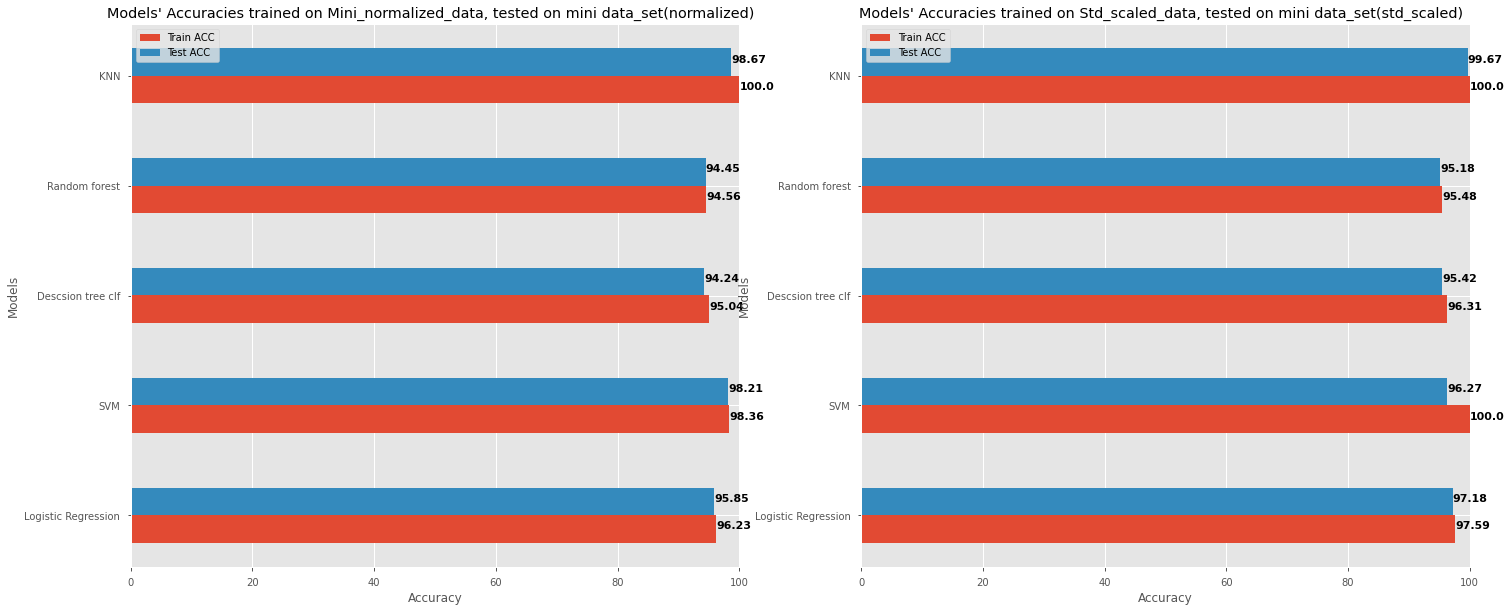

In [38]:
plt.figure(figsize=(24,10))

plt.subplot(1, 2, 1)
plt.style.use('seaborn-notebook')

AccPlot(Mode_names, mini_normalize_train_scores, mini_normalize_test_scores,
        title="Models' Accuracies trained on Mini_normalized_data, tested on mini data_set(normalized)  ")

plt.subplot(1, 2, 2)

AccPlot(Mode_names, mini_scaled_train_scores, mini_scaled_test_scores,
        title="Models' Accuracies trained on Std_scaled_data, tested on mini data_set(std_scaled)  ")

# ***Results of phase one***

- ### **Performance**
  - Std scaler small sample models performed considerably better than normalized mini sample models, but the processing time was about tripled (time complexity).
  - For rapid fitting and excellent accuracy results, normalized mini sample models were preferable.

- ### **Notes**
  - The reason for the std scaler's sluggish performance is the fit transform feature, which requires reshaping data to fit the model before calculating the score, which takes longer than the normalization method.
  - Due to the nature of the Original _data set, KNN with n neighbors = 1 appears to be working very well.

- ### **Conclusions**
  - Logistic Regression is the Fastest model.
  - KNN and SVM appear to function quickly and accurately, but slower than Logistic regression.
  - Logistic regression is the best classifier if the data is normalized since it is extremely quick.



## ***Testing std_scaler models vs the normalized models on the balanced data_set***
- balanced data has to be scaled or normalized based on the model running on it otherwise it will have accuracy issues

In [26]:
normalize_train_scores = []
normalize_test_scores = []

for idx, value in enumerate(Models):
    fitted_model = Model_fit(value, mini_normalize_X_train, mini_normalize_y_train)
    Model_ACC_arrs(fitted_model,
                   normalize_X_train, normalize_y_train,
                   normalize_X_test, normalize_y_test,
                   normalize_train_scores, normalize_test_scores)


In [27]:
Scaled_train_scores = []
Scaled_test_scores = []

for idx, value in enumerate(Models):
    fitted_model = Model_fit(value, mini_scaled_X_train, mini_scaled_y_train)
    Model_ACC_arrs(fitted_model,
                   scaled_X_train, scaled_y_train,
                   scaled_X_test, scaled_y_test,
                   Scaled_train_scores, Scaled_test_scores)


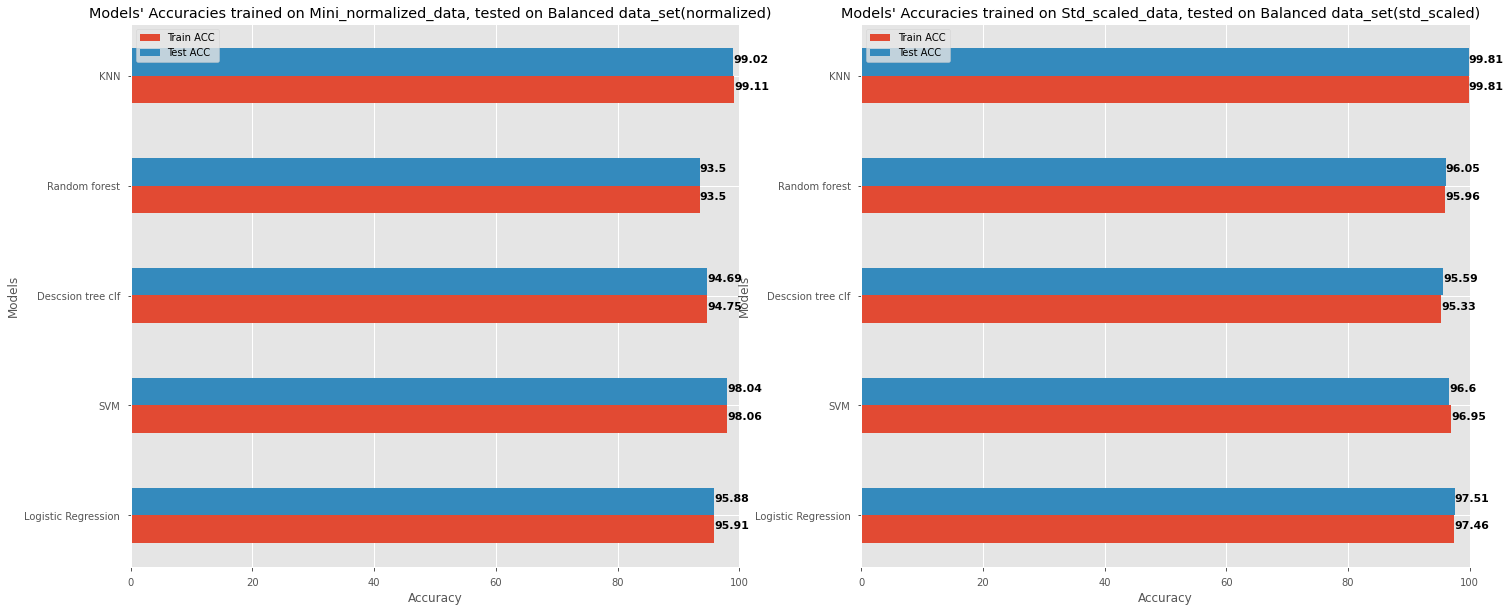

In [39]:
plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)

AccPlot(Mode_names, normalize_train_scores, normalize_test_scores,
        title="Models' Accuracies trained on Mini_normalized_data, tested on Balanced data_set(normalized)  ")

plt.subplot(1, 2, 2)

AccPlot(Mode_names, Scaled_train_scores, Scaled_test_scores,
        title="Models' Accuracies trained on Std_scaled_data, tested on Balanced data_set(std_scaled)  ")


# ***Results of phase two***

- ### **Performance**
  - std scaler worked somewhat better than predicted.
  - The time complexity of the std scaler model is significantly higher; it took more than three times as long as the normalized model.

- ### **Notes**
  - the same cause for the sluggish performance
  - Data must be normalized or std_scaled according to the model.

- ### **Conclusions**
  - KNN is on the lead
  - normalized model : SVM & KNN seems to be the best models to fit on the balanced data
  - Logistic  regression is still the fastest ,and with noticeably high accuracy  


## ***Testing std_scaler models vs the normalized models on the Orogional data_set***
- Orogional data has to be scaled or normalized based on the model running on it otherwise it will have accuracy issues

In [29]:
norm_Original_train_scores = []
norm_Original_test_scores = []

for idx, value in enumerate(Models):
    fitted_model = Model_fit(value, mini_normalize_X_train, mini_normalize_y_train)
    Model_ACC_arrs(fitted_model,
                   X_train_norm, y_train_norm,
                   X_test_norm, y_test_norm,
                   norm_Original_train_scores, norm_Original_test_scores)

In [30]:
scaled_Original_train_scores = []
scaled_Original_test_scores = []

for idx, value in enumerate(Models):
    fitted_model = Model_fit(value, mini_scaled_X_train, mini_scaled_y_train)
    Model_ACC_arrs(fitted_model,
                   X_train_std_scaled, y_train_std_scaled,
                   X_test_std_scaled, y_test_std_scaled,
                   scaled_Original_train_scores, scaled_Original_test_scores)

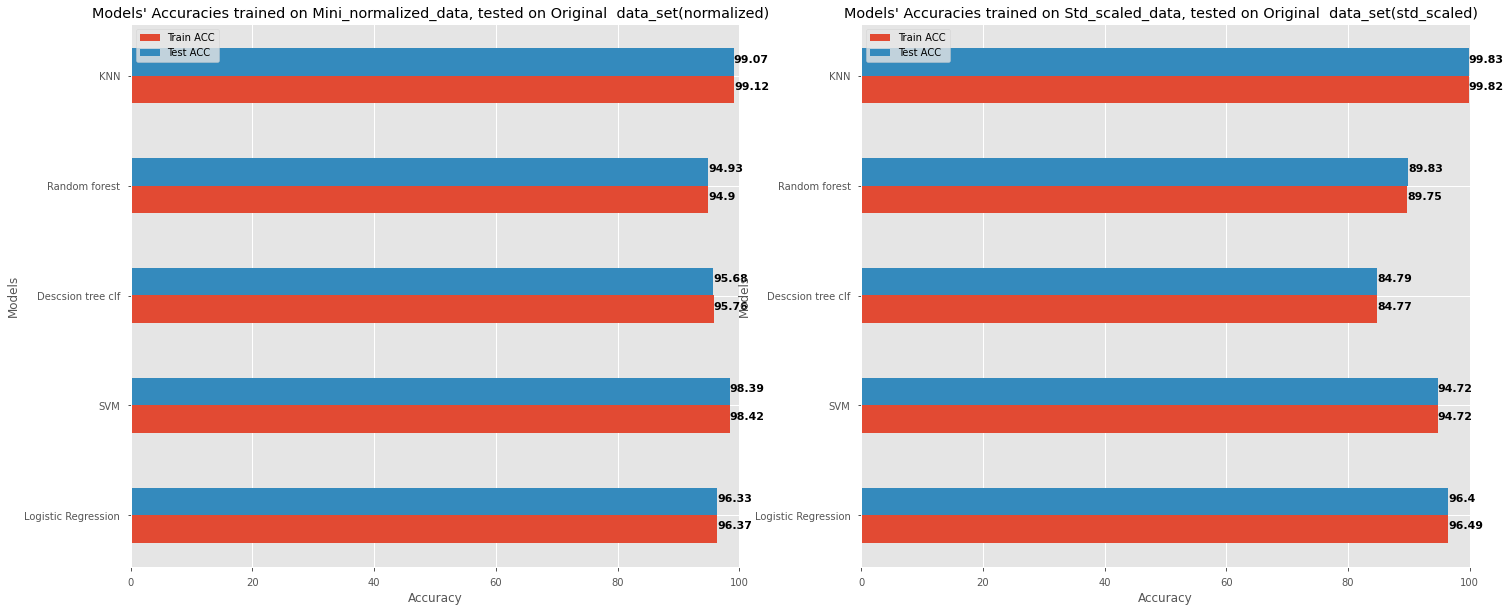

In [40]:
plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)

AccPlot(Mode_names, norm_Original_train_scores, norm_Original_test_scores,
        title="Models' Accuracies trained on Mini_normalized_data, tested on Original  data_set(normalized)  ")


plt.subplot(1, 2, 2)

AccPlot(Mode_names, scaled_Original_train_scores, scaled_Original_test_scores,
        title="Models' Accuracies trained on Std_scaled_data, tested on Original  data_set(std_scaled)  ")



# ***Results of phase two***

- ### **Performance**
  - Normalized models outperform std models substantially.

- ### **Notes**
  - The same cause for the sluggish performance
  - Std_scaler models took roughly 7 times the time Normalized models took

- ### **Conclusions**
  - As indicated by the classification report, knn has the best accuracy.
  - Normalized models are better than std_scalers models for this Data_set
  - **It's best to use logistic regression,** because it's significantly quicker than other models and has a slightly lower accuracy trade-off.
  - **It's preferable to use KNN,** since it provides somewhat greater accuracy at a lower cost of time complexity.
